In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from IPython.display import Markdown
from ranking_sys import Ranking

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [2]:
pd.options.display.float_format = '{:.0f}'.format

In [3]:
data = pd.read_csv('data/spotify_most_streamed_2024.zip', encoding='unicode_escape')
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [4]:
#The column names are changed because in the next tasks it will be easy to user the new style of column name.
def rename_column(column):
    new_column_name = str(column).lower()
    new_column_name = new_column_name.replace(' ', '_')
    
    return new_column_name

In [5]:
data.columns = pd.Index(data.columns.to_series().apply(rename_column))
data

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


In [6]:
#Alternative way to change the name of the columns
# data.columns = data.columns.map(rename_column)

In [7]:
#Checking the data types
data.dtypes

track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                  object
track_score                   float64
spotify_streams                object
spotify_playlist_count         object
spotify_playlist_reach         object
spotify_popularity            float64
youtube_views                  object
youtube_likes                  object
tiktok_posts                   object
tiktok_likes                   object
tiktok_views                   object
youtube_playlist_reach         object
apple_music_playlist_count    float64
airplay_spins                  object
siriusxm_spins                 object
deezer_playlist_count         float64
deezer_playlist_reach          object
amazon_playlist_count         float64
pandora_streams                object
pandora_track_stations         object
soundcloud_streams             object
shazam_count

In [8]:
#Change format of release date - from object to datetime
data.release_date = pd.to_datetime(data.release_date, format='%m/%d/%Y')
data.release_date

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
4595   2017-09-05
4596   2018-07-27
4597   2020-02-28
4598   2016-11-08
4599   2017-04-11
Name: release_date, Length: 4600, dtype: datetime64[ns]

In [9]:
#Convert the column data in all time rank in string. So we can replace comma with empty string
data.all_time_rank = data.all_time_rank.astype(str).str.replace(',', '', regex=False)

#Convert all time rank data in the column to type float
data.all_time_rank = pd.to_numeric(data.all_time_rank, errors='coerce').astype(float)

data.all_time_rank

0         1
1         2
2         3
3         4
4         5
       ... 
4595   4585
4596   4575
4597   4571
4598   4591
4599   4593
Name: all_time_rank, Length: 4600, dtype: float64

In [10]:
data.dtypes

track                                 object
album_name                            object
artist                                object
release_date                  datetime64[ns]
isrc                                  object
all_time_rank                        float64
track_score                          float64
spotify_streams                       object
spotify_playlist_count                object
spotify_playlist_reach                object
spotify_popularity                   float64
youtube_views                         object
youtube_likes                         object
tiktok_posts                          object
tiktok_likes                          object
tiktok_views                          object
youtube_playlist_reach                object
apple_music_playlist_count           float64
airplay_spins                         object
siriusxm_spins                        object
deezer_playlist_count                float64
deezer_playlist_reach                 object
amazon_pla

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [11]:
#Group by artist and counting the songs
artist_counts = data.groupby('artist')['track'].count().reset_index()

#Changing the name of the songs count column
artist_counts = artist_counts.rename(columns={'track': 'songs_count'})

#Sorting the songs by count in descending order
artist_counts = artist_counts.sort_values(by='songs_count', ascending=False)

#Get the first five songs
artist_with_explicit_songs = artist_counts.head(5)
artist_with_explicit_songs

,artist,songs_count
517,Drake,63
1690,Taylor Swift,63
183,Bad Bunny,60
915,KAROL G,32
1728,The Weeknd,31


In [12]:
all_songs_data = data[['artist', 'track', 'explicit_track']].copy()
all_songs_data

,artist,track,explicit_track
0,Tommy Richman,MILLION DOLLAR BABY,0
1,Kendrick Lamar,Not Like Us,1
2,Artemas,i like the way you kiss me,0
3,Miley Cyrus,Flowers,0
4,Eminem,Houdini,1
...,...,...,...
4595,$uicideboy$,For the Last Time,1
4596,Atif Aslam,Dil Meri Na Sune,0
4597,Lil Baby,Grace (feat. 42 Dugg),1
4598,Arijit Singh,Nashe Si Chadh Gayi,0


In [13]:

#Get artists which has cleaned songs
cleaned = all_songs_data[all_songs_data['explicit_track'] == 0]['artist'].tolist()

#Get artists which has explicit songs
explicit = all_songs_data[all_songs_data['explicit_track'] == 1]['artist'].tolist()

#Create new list with artists which has ONLY cleaned songs
only_cleaned_artists = [a for a in cleaned if a not in explicit]

#Get all artist and checking if he is in the list with only cleaned artists. If he is in the list, then group by and count the songs
cleaned_artists = all_songs_data[all_songs_data['artist'].isin(only_cleaned_artists)].groupby('artist')['track'].count().reset_index()

#Sorting the artist by songs count in descending order
cleaned_artists = cleaned_artists.sort_values(by='track', ascending=False)

#Chaning the column name
cleaned_artists = cleaned_artists.rename(columns={'track': 'songs_count'})

#Get the first five artist which are only with clean songs and no explicit songs in the main dataset
cleaned_artists = cleaned_artists.head(5)
cleaned_artists

,artist,songs_count
519,Imagine Dragons,16
116,BTS,14
702,Linkin Park,13
734,Luke Combs,13
488,Harry Styles,12


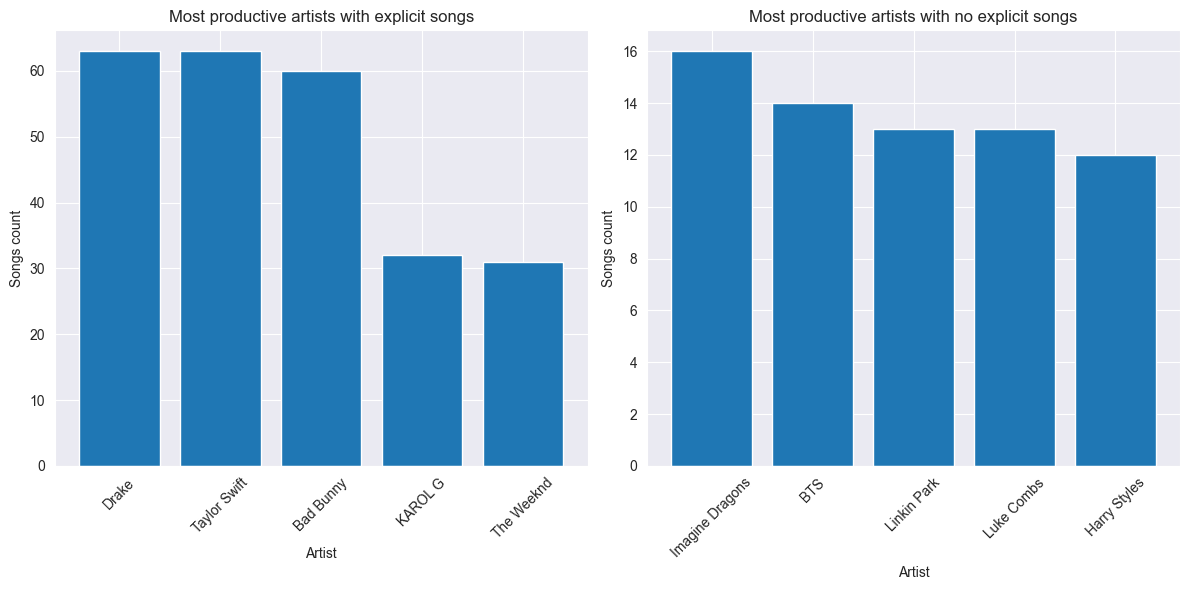

In [14]:
#Most productive artists with explicit and no explicit songs in the main dataset.
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) 

axs[0].bar(artist_with_explicit_songs.artist, artist_with_explicit_songs.songs_count)
axs[0].set_title('Most productive artists with explicit songs')
axs[0].set_xlabel('Artist')
axs[0].set_ylabel('Songs count')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(cleaned_artists.artist, cleaned_artists.songs_count)
axs[1].set_title('Most productive artists with no explicit songs')
axs[1].set_xlabel('Artist')
axs[1].set_ylabel('Songs count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

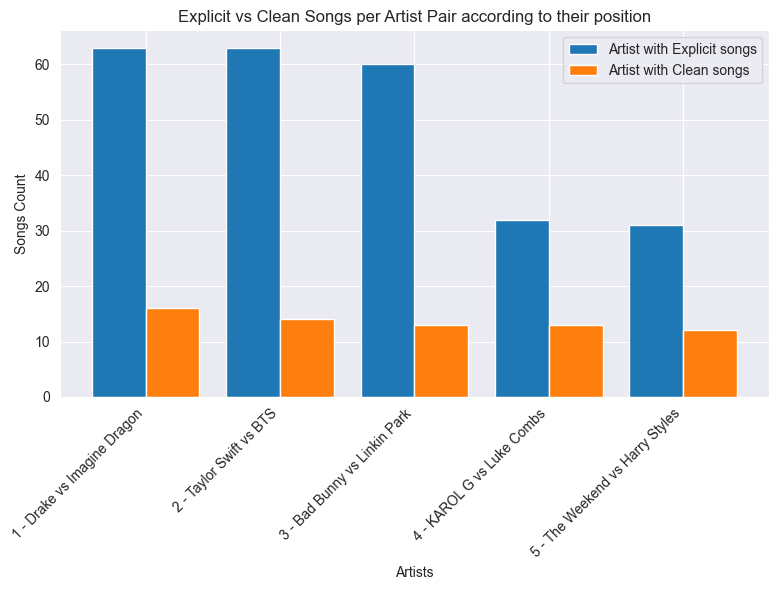

In [15]:
w = 0.4
x = ['1 - Drake vs Imagine Dragon', '2 - Taylor Swift vs BTS', '3 - Bad Bunny vs Linkin Park', '4 - KAROL G vs Luke Combs', '5 - The Weekend vs Harry Styles']
explicits_songs_data = artist_with_explicit_songs.songs_count.tolist()
cleaned_songs_data = cleaned_artists.songs_count.tolist()

plt.figure(figsize=(8, 6))

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
plt.bar(bar1, explicits_songs_data, w, label='Artist with Explicit songs')
plt.bar(bar2, cleaned_songs_data, w, label='Artist with Clean songs')

plt.xticks([r + w/2 for r in bar1], x, rotation=45, ha='right')
plt.xlabel('Artists')
plt.ylabel('Songs Count')
plt.title('Explicit vs Clean Songs per Artist Pair according to their position')
plt.legend()
plt.tight_layout()
plt.show()

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [16]:
def remove_comma_and_return_int(val):
    if pd.isna(val):
        return np.nan
    return int(str(val).replace(',', ''))

In [17]:
def format_number(number):
    return "{:,}".format(number)

In [18]:
most_streamed_artists = data[['artist', 'spotify_streams']].copy()
most_streamed_artists['spotify_streams'] = most_streamed_artists['spotify_streams'].apply(remove_comma_and_return_int).astype('Int64') 
most_five_streamed_artists = most_streamed_artists.sort_values(by='spotify_streams', ascending=False)

grouped = most_five_streamed_artists.groupby('artist', as_index=False)['spotify_streams'].sum()
grouped = grouped.sort_values(by='spotify_streams', ascending=False)

most_five_grouped_order_by_desc = grouped.head(5).copy()
most_five_grouped_order_by_desc['spotify_streams'] = most_five_grouped_order_by_desc['spotify_streams'].apply(format_number)
most_five_grouped_order_by_desc


,artist,spotify_streams
183,Bad Bunny,"37,054,834,425"
1728,The Weeknd,"36,948,540,278"
517,Drake,"34,962,157,577"
1690,Taylor Swift,"34,470,771,165"
1428,Post Malone,"26,137,472,958"


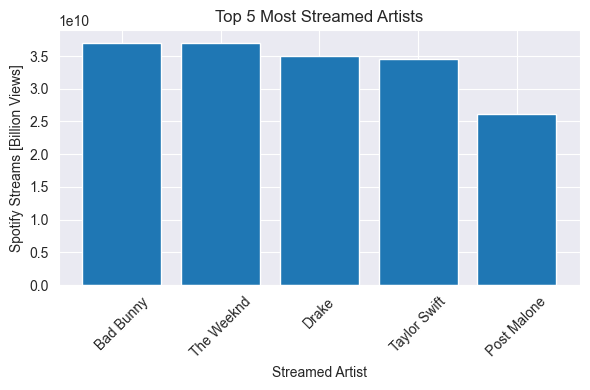

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(most_five_grouped_order_by_desc['artist'], most_five_grouped_order_by_desc['spotify_streams'].apply(lambda x: int(x.replace(',', ''))))

plt.xlabel('Streamed Artist')
plt.ylabel('Spotify Streams [Billion Views]')
plt.title('Top 5 Most Streamed Artists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

In [20]:
# def songs_count_by_year()

In [21]:
#Getting the columns to analyse and make a copy to avoid the warnings
all_released_songs = data[['track', 'release_date']].copy()

#Grouped the songs by release year. 
songs_count = all_released_songs.groupby(all_released_songs['release_date'].dt.year).size().reset_index(name='count')
sorted_result = songs_count.sort_values(by='release_date', ascending=False)
sorted_result = sorted_result.rename(columns={'count': 'songs_count'})
sorted_result = sorted_result.rename(columns={'release_date': 'release_year'})
sorted_result

,release_year,songs_count
29,2024,693
28,2023,1158
27,2022,694
26,2021,408
25,2020,360
24,2019,296
23,2018,249
22,2017,213
21,2016,123
20,2015,96


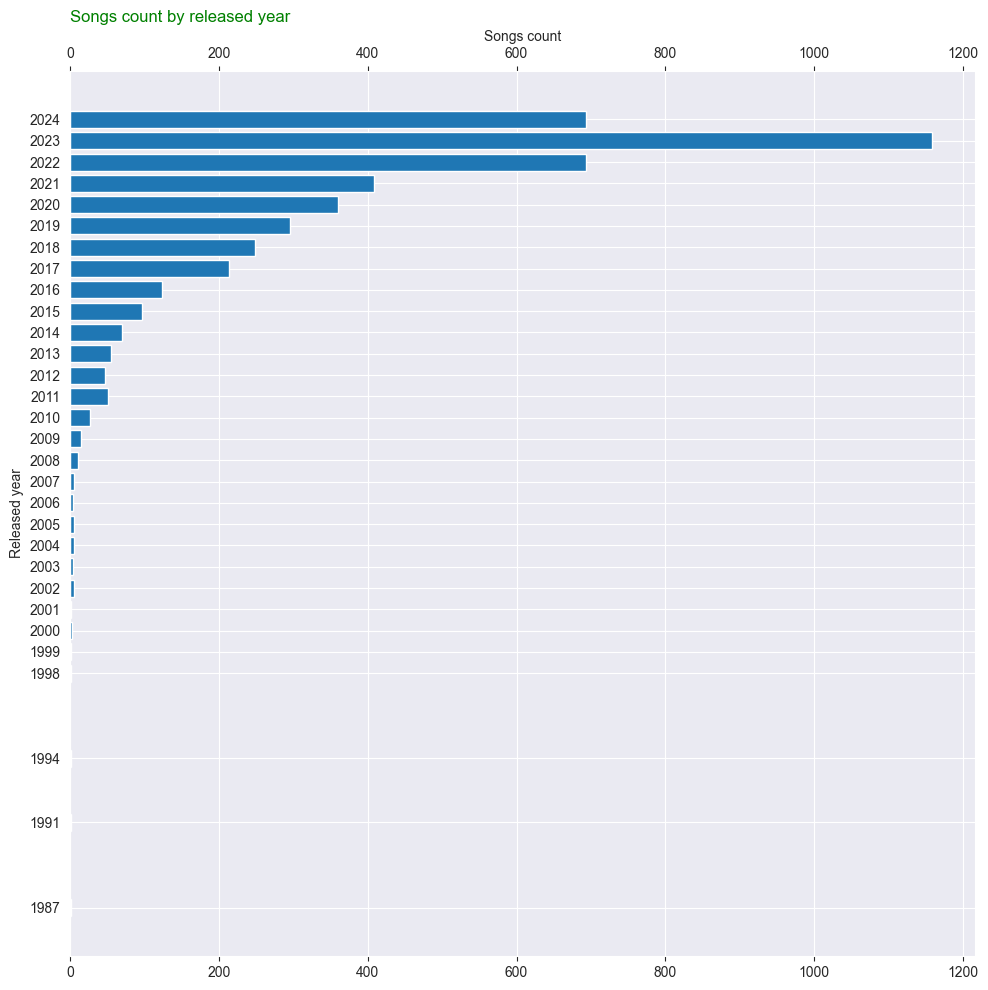

In [22]:
plt.figure(figsize=(10, 10))
plt.barh(sorted_result.release_year, sorted_result.songs_count)
plt.title('Songs count by released year', loc='left', color='green')
plt.ylabel('Released year')
plt.xlabel('Songs count')
plt.yticks(sorted_result.release_year)
plt.tick_params(axis='x', which='both', top=True, labeltop=True)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().xaxis.set_label_position('top')
plt.tight_layout()
plt.show()

In [23]:
#Getting the columns to analyse and make a copy to avoid the warnings
all_released_songs_by_month = data[['track', 'release_date']].copy()

#Grouped the songs by release year. 
songs_count_by_month = all_released_songs_by_month.groupby(all_released_songs['release_date'].dt.month).size().reset_index(name='count')
sorted_result_by_month = songs_count_by_month.sort_values(by='release_date', ascending=False)
sorted_result_by_month = sorted_result_by_month.rename(columns={'count': 'songs_count'})
sorted_result_by_month = sorted_result_by_month.rename(columns={'release_date': 'release_month'})
sorted_result_by_month

,release_month,songs_count
11,12,272
10,11,350
9,10,384
8,9,328
7,8,315
6,7,321
5,6,395
4,5,511
3,4,420
2,3,430


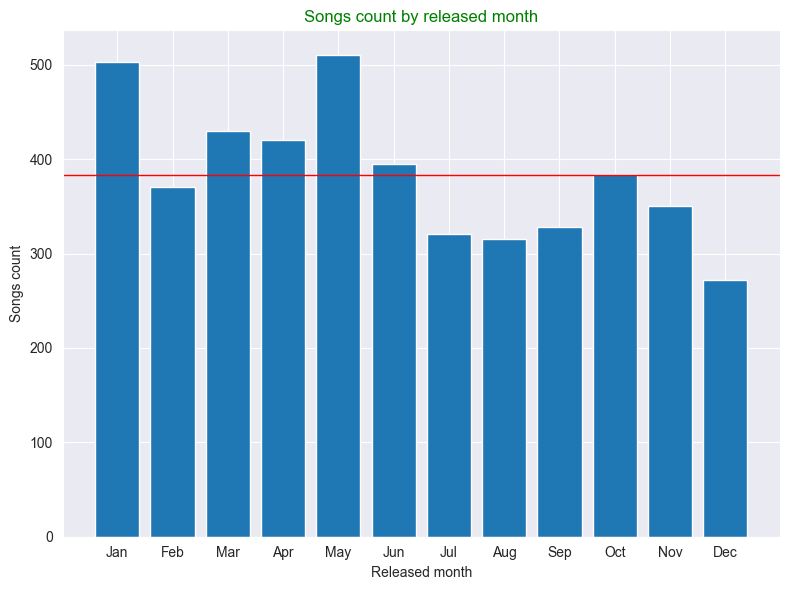

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(sorted_result_by_month.release_month, sorted_result_by_month.songs_count)
plt.title('Songs count by released month', loc='center', color='green')
plt.ylabel('Songs count')
plt.xlabel('Released month')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(y=sorted_result_by_month.songs_count.mean(), color='red', linestyle='-', linewidth=1, label='Mean Value')
plt.tight_layout()
plt.show()

#### *We see an above-average number of songs released in the first half of the year. This is likely due to the need to release songs before the summer, which is an active season for holidays, parties, and events. Releasing songs earlier allows enough time for promotion and for the songs to gain popularity ahead of the summer season.*

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

In [25]:
#Read the main set for better understanding of the problem
data

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


In [26]:
#Getting the columns which we will analyze and make a copy to avoid a warnings
data_playlist_columns = data[['track', 'spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']].copy()

#Reading the datas that we get
data_playlist_columns

,track,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
0,MILLION DOLLAR BABY,"30,716",210,62,114
1,Not Like Us,"28,113",188,67,111
2,i like the way you kiss me,"54,331",190,136,172
3,Flowers,"269,802",394,264,210
4,Houdini,"7,223",182,82,105
...,...,...,...,...,...
4595,For the Last Time,"65,770",3,2,NaN
4596,Dil Meri Na Sune,"4,602",1,1,NaN
4597,Grace (feat. 42 Dugg),"72,066",19,1,6
4598,Nashe Si Chadh Gayi,"14,037",1,NaN,7


In [27]:
data_playlist_columns.spotify_playlist_count = data_playlist_columns.spotify_playlist_count.apply(lambda x: float(str(x).replace(',', '')))

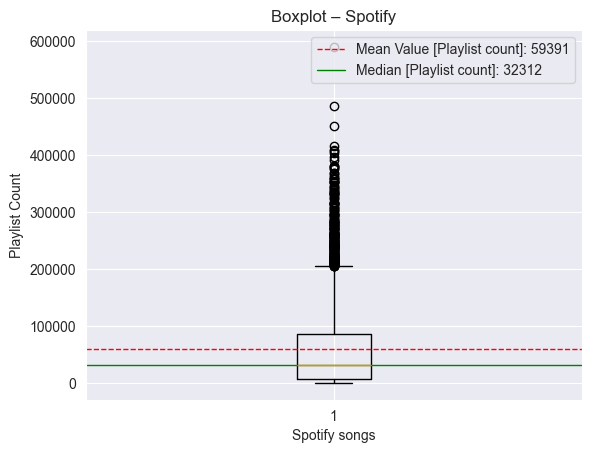

In [28]:
median = data_playlist_columns.spotify_playlist_count.dropna().median()
mean_value = data_playlist_columns.spotify_playlist_count.dropna().mean()

plt.boxplot(data_playlist_columns.spotify_playlist_count.dropna())
plt.xlabel('Spotify songs')
plt.ylabel('Playlist Count')
plt.title('Boxplot – Spotify')

# Mean Value
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean Value [Playlist count]: {mean_value:.0f}')

# Mediana
plt.axhline(median, color='green', linestyle='-', linewidth=1, label=f'Median [Playlist count]: {median:.0f}')

plt.legend()
plt.show()

### 50% of the songs were added to no more than 32,312 playlists. The distribution is right-skewed, as the mean value is significantly higher than the median, which indicates asymmetry. Therefore, the most appropriate correlation method to use is "Spearman".

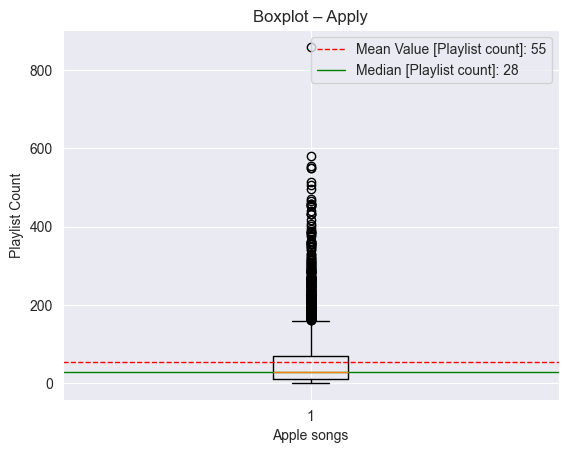

In [29]:
median = data_playlist_columns.apple_music_playlist_count.dropna().median()
mean_value = data_playlist_columns.apple_music_playlist_count.dropna().mean()

plt.boxplot(data_playlist_columns.apple_music_playlist_count.dropna())
plt.xlabel('Apple songs')
plt.ylabel('Playlist Count')
plt.title('Boxplot – Apply')

# Mean Value
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean Value [Playlist count]: {mean_value:.0f}')

# Mediana
plt.axhline(median, color='green', linestyle='-', linewidth=1, label=f'Median [Playlist count]: {median:.0f}')

plt.legend()
plt.show()

### 50% of the songs were added to no more than 28 playlists. The distribution is right-skewed, as the mean value is significantly higher than the median, which indicates asymmetry. Therefore, the most appropriate correlation method to use is "Spearman".

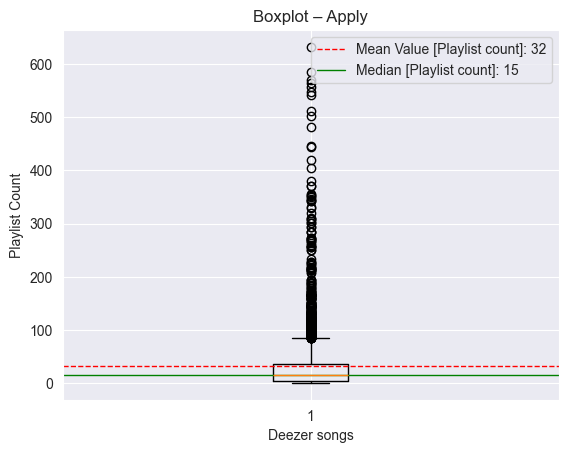

In [30]:
median = data_playlist_columns.deezer_playlist_count.dropna().median()
mean_value = data_playlist_columns.deezer_playlist_count.dropna().mean()

plt.boxplot(data_playlist_columns.deezer_playlist_count.dropna())
plt.xlabel('Deezer songs')
plt.ylabel('Playlist Count')
plt.title('Boxplot – Apply')

# Mean Value
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean Value [Playlist count]: {mean_value:.0f}')

# Mediana
plt.axhline(median, color='green', linestyle='-', linewidth=1, label=f'Median [Playlist count]: {median:.0f}')

plt.legend()
plt.show()

### 50% of the songs were added to no more than 15 playlists. The distribution is right-skewed, as the mean value is significantly higher than the median, which indicates asymmetry. Therefore, the most appropriate correlation method to use is "Spearman".

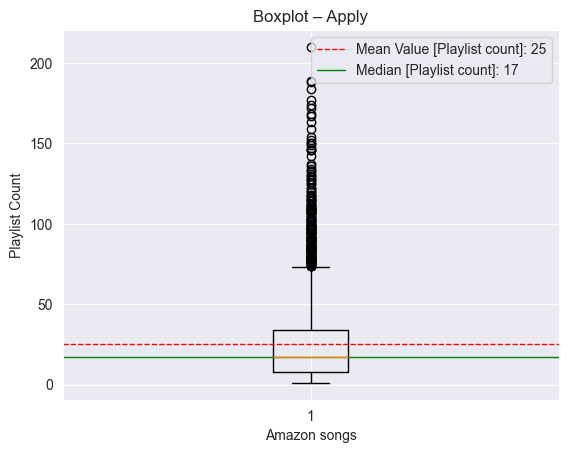

In [31]:
median = data_playlist_columns.amazon_playlist_count.dropna().median()
mean_value = data_playlist_columns.amazon_playlist_count.dropna().mean()

plt.boxplot(data_playlist_columns.amazon_playlist_count.dropna())
plt.xlabel('Amazon songs')
plt.ylabel('Playlist Count')
plt.title('Boxplot – Apply')

# Mean Value
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean Value [Playlist count]: {mean_value:.0f}')

# Mediana
plt.axhline(median, color='green', linestyle='-', linewidth=1, label=f'Median [Playlist count]: {median:.0f}')

plt.legend()
plt.show()

### 50% of the songs were added to no more than 17 playlists. The distribution is right-skewed, as the mean value is significantly higher than the median, which indicates asymmetry. Therefore, the most appropriate correlation method to use is "Spearman".

In [32]:
data_playlist_columns[['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']].corr(method='spearman')

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1,1,1,0
apple_music_playlist_count,1,1,1,1
deezer_playlist_count,1,1,1,1
amazon_playlist_count,0,1,1,1


In [33]:
data_playlist_columns[['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']].corr(method='kendall')

,spotify_playlist_count,apple_music_playlist_count,deezer_playlist_count,amazon_playlist_count
spotify_playlist_count,1,0,0,0
apple_music_playlist_count,0,1,1,0
deezer_playlist_count,0,1,1,0
amazon_playlist_count,0,0,0,1


### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

In [34]:
youtube_views_and_likes = data[['track', 'youtube_views', 'youtube_likes']].copy()

youtube_views_and_likes['youtube_views'] = youtube_views_and_likes['youtube_views'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)
youtube_views_and_likes['youtube_likes'] = youtube_views_and_likes['youtube_likes'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)

youtube_views_and_likes

,track,youtube_views,youtube_likes
0,MILLION DOLLAR BABY,84274754,1713126
1,Not Like Us,116347040,3486739
2,i like the way you kiss me,122599116,2228730
3,Flowers,1096100899,10629796
4,Houdini,77373957,3670188
...,...,...,...
4595,For the Last Time,149247747,1397590
4596,Dil Meri Na Sune,943920245,5347766
4597,Grace (feat. 42 Dugg),201027333,1081402
4598,Nashe Si Chadh Gayi,1118595159,3868828


In [35]:
#Add new column "ratio"
youtube_views_and_likes['ratio'] = youtube_views_and_likes.youtube_views / youtube_views_and_likes.youtube_likes

#Mean value of the ratio column
mean_ratio = youtube_views_and_likes.ratio.mean()
print(f"The Mean value of the ratio between YouTube views and likes is {mean_ratio:.2f}")


The Mean value of the ratio between YouTube views and likes is 169.12


In [36]:
youtube_views_and_likes_for_distribution = youtube_views_and_likes.copy()
youtube_views_and_likes_for_distribution.ratio = youtube_views_and_likes_for_distribution.ratio.fillna(0)

In [37]:
#Looking for high ratio values which are not characteristic for the set
high_ratio = youtube_views_and_likes_for_distribution[youtube_views_and_likes_for_distribution['ratio'] > 1750][['track', 'youtube_views', 'youtube_likes', 'ratio']]
high_ratio

,track,youtube_views,youtube_likes,ratio
502,Toyour ï¿½ï¿½ï¿,854850866,6612,129288
2920,Shoong! (feat. LISA of BLACKPINK),147699486,22687,6510


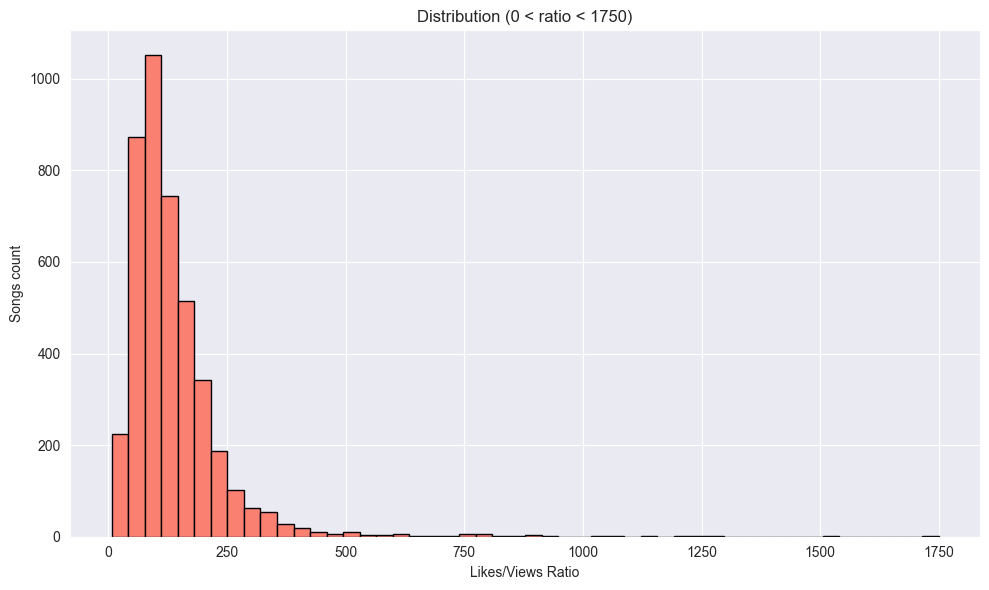

In [38]:

#If you don't ignore high ratio values we can't show good distribution of the data.
#That's why we exclude this two rows with very high ratio.
filtered = youtube_views_and_likes_for_distribution[
    (youtube_views_and_likes_for_distribution['ratio'] > 0) &
    (youtube_views_and_likes_for_distribution['ratio'] < 1750)
]

plt.figure(figsize=(10, 6))
plt.hist(filtered['ratio'], bins=50, edgecolor='black', color='salmon')
plt.xlabel('Likes/Views Ratio')
plt.ylabel('Songs count')
plt.title('Distribution (0 < ratio < 1750)')
plt.grid(True)
plt.tight_layout()
plt.show()

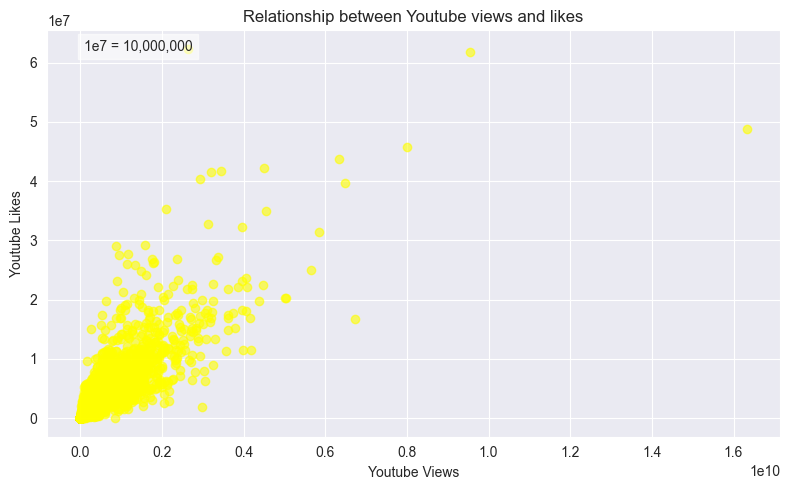

In [39]:
#Scatter plot - Relationship between views and likes
plt.figure(figsize=(8, 5))
plt.scatter(
    youtube_views_and_likes.youtube_views,
    youtube_views_and_likes.youtube_likes,
    alpha=0.6,
    color='yellow',
)

plt.text(
    x=0.05, y=0.95,
    s='1e7 = 10,000,000',
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='baseline',
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.title('Relationship between Youtube views and likes')
plt.xlabel('Youtube Views')
plt.ylabel('Youtube Likes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
youtube_views_and_likes_for_distribution[['youtube_views', 'youtube_likes']].corr(method='spearman')

,youtube_views,youtube_likes
youtube_views,1,1
youtube_likes,1,1


### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

In [41]:
#Reading the data for better understanding (I don't want to scroll to the top of the page)
data

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


### Tik-Tok release date is	20 September 2016

In [42]:
most_popular_song_in_tiktok = data[['track', 'release_date', 'tiktok_views', 'tiktok_posts', 'tiktok_likes']].copy()

most_popular_song_in_tiktok['tiktok_views'] = most_popular_song_in_tiktok['tiktok_views'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)
most_popular_song_in_tiktok['tiktok_posts'] = most_popular_song_in_tiktok['tiktok_posts'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)
most_popular_song_in_tiktok['tiktok_likes'] = most_popular_song_in_tiktok['tiktok_likes'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)

most_popular_song_in_tiktok

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes
0,MILLION DOLLAR BABY,2024-04-26,5332281936,5767700,651565900
1,Not Like Us,2024-05-04,208339025,674700,35223547
2,i like the way you kiss me,2024-03-19,3369120610,3025400,275154237
3,Flowers,2023-01-12,14603725994,7189811,1078757968
4,Houdini,2024-05-31,NaN,16400,NaN
...,...,...,...,...,...
4595,For the Last Time,2017-09-05,143934379,48370,20202000
4596,Dil Meri Na Sune,2018-07-27,19935,NaN,1721
4597,Grace (feat. 42 Dugg),2020-02-28,36849005,7596,5288677
4598,Nashe Si Chadh Gayi,2016-11-08,37757301,11433,2534831


In [43]:
songs_after_tiktok_release_date = most_popular_song_in_tiktok[most_popular_song_in_tiktok.release_date > '2016-09-20'].copy()
songs_after_tiktok_release_date

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes
0,MILLION DOLLAR BABY,2024-04-26,5332281936,5767700,651565900
1,Not Like Us,2024-05-04,208339025,674700,35223547
2,i like the way you kiss me,2024-03-19,3369120610,3025400,275154237
3,Flowers,2023-01-12,14603725994,7189811,1078757968
4,Houdini,2024-05-31,NaN,16400,NaN
...,...,...,...,...,...
4595,For the Last Time,2017-09-05,143934379,48370,20202000
4596,Dil Meri Na Sune,2018-07-27,19935,NaN,1721
4597,Grace (feat. 42 Dugg),2020-02-28,36849005,7596,5288677
4598,Nashe Si Chadh Gayi,2016-11-08,37757301,11433,2534831


In [44]:
songs_after_tiktok_release_date['release_date'] = pd.to_datetime(songs_after_tiktok_release_date['release_date'])
songs_after_tiktok_release_date['year'] = songs_after_tiktok_release_date['release_date'].dt.year
summary_by_year = songs_after_tiktok_release_date.groupby('year')[['tiktok_views', 'tiktok_posts', 'tiktok_likes']].sum().reset_index()
summary_by_year = summary_by_year.sort_values(by='year', ascending=False)
summary_by_year


,year,tiktok_views,tiktok_posts,tiktok_likes
8,2024,47470965442,41562581,4644734138
7,2023,454816188900,414117668,41296273341
6,2022,832975012888,533159055,73187502803
5,2021,631177503424,313520719,64080595816
4,2020,533191896010,526946350,56829160687
3,2019,394210724566,403133137,37934366902
2,2018,267661151841,271266712,26430754537
1,2017,174362854260,243161836,17893942270
0,2016,14074233259,28776257,1817805623


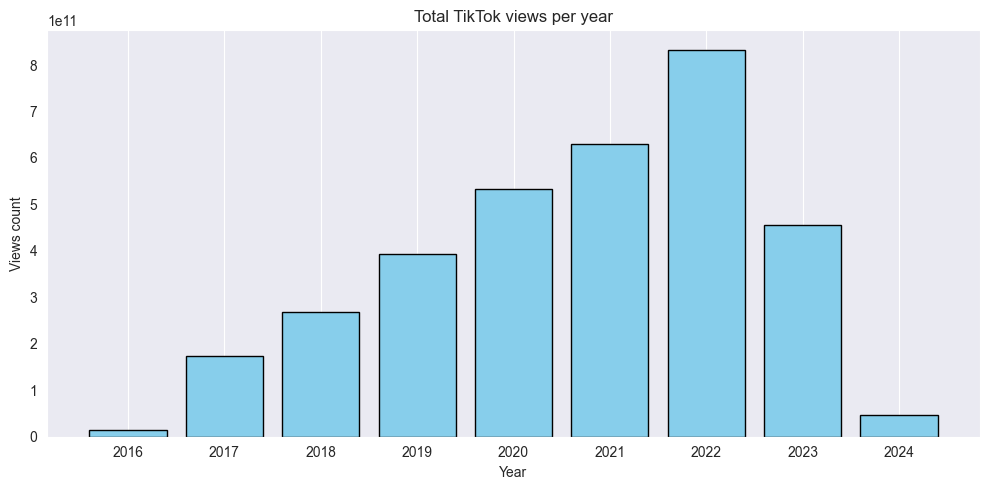

In [45]:
plt.figure(figsize=(10, 5))
plt.bar(summary_by_year['year'], summary_by_year['tiktok_views'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Views count')
plt.title('Total TikTok views per year')
plt.xticks(summary_by_year['year'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 2022 is the peak of the Tik-Tok Views from the beginning until 2024

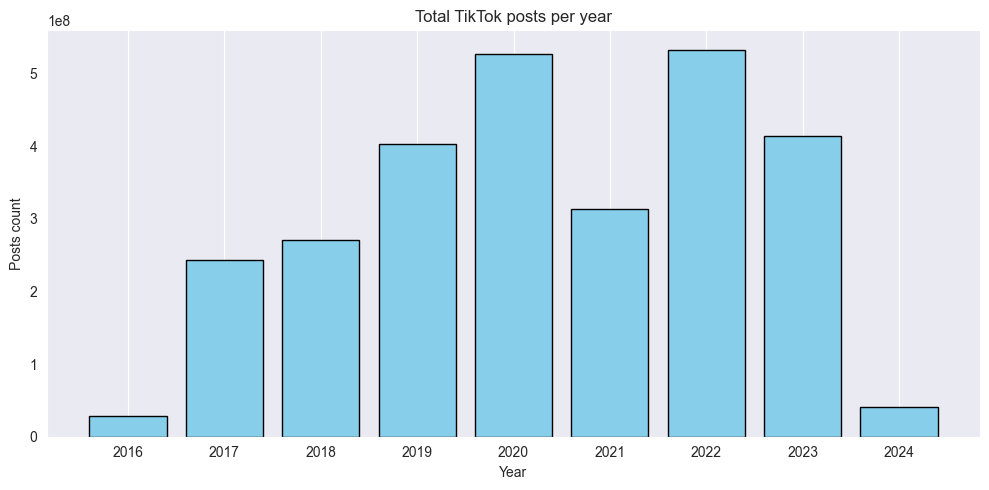

In [46]:
plt.figure(figsize=(10, 5))
plt.bar(summary_by_year['year'], summary_by_year['tiktok_posts'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Posts count')
plt.title('Total TikTok posts per year')
plt.xticks(summary_by_year['year'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

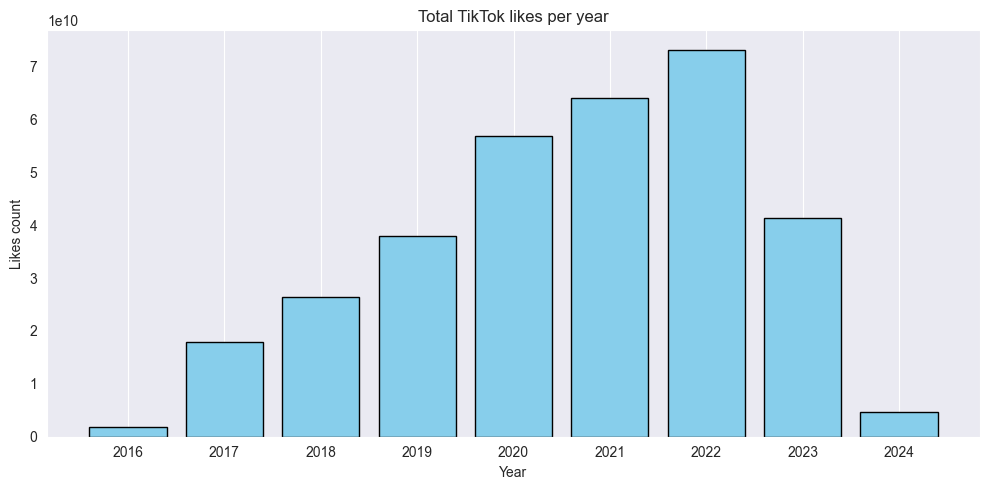

In [47]:
plt.figure(figsize=(10, 5))
plt.bar(summary_by_year['year'], summary_by_year['tiktok_likes'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Likes count')
plt.title('Total TikTok likes per year')
plt.xticks(summary_by_year['year'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
songs_after_tiktok_release_date

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes,year
0,MILLION DOLLAR BABY,2024-04-26,5332281936,5767700,651565900,2024
1,Not Like Us,2024-05-04,208339025,674700,35223547,2024
2,i like the way you kiss me,2024-03-19,3369120610,3025400,275154237,2024
3,Flowers,2023-01-12,14603725994,7189811,1078757968,2023
4,Houdini,2024-05-31,NaN,16400,NaN,2024
...,...,...,...,...,...,...
4595,For the Last Time,2017-09-05,143934379,48370,20202000,2017
4596,Dil Meri Na Sune,2018-07-27,19935,NaN,1721,2018
4597,Grace (feat. 42 Dugg),2020-02-28,36849005,7596,5288677,2020
4598,Nashe Si Chadh Gayi,2016-11-08,37757301,11433,2534831,2016


# Most popular song of 2016

In [49]:
RESEARCH_YEAR = 2016

In [50]:

RESEARCH_YEAR = songs_after_tiktok_release_date.loc[songs_after_tiktok_release_date.year == RESEARCH_YEAR]
RESEARCH_YEAR

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes,year
262,Starboy,2016-09-22,375498232,262780,52707882,2016
309,Rockabye (feat. Sean Paul & Anne-Marie),2016-10-21,595697842,2416274,61034077,2016
322,Congratulations,2016-11-04,811673866,955053,99916455,2016
379,That's What I Like,2016-11-17,704916578,604526,100008149,2016
492,Redbone,2016-11-17,430258743,111904,56162755,2016
592,There's Nothing Holdin' Me Back,2016-09-23,544400947,2310405,82394327,2016
824,I Feel It Coming,2016-11-17,36437,NaN,2430,2016
1316,I Donï¿½ï¿½ï¿½t Wanna Live Forever (Fifty Shad...,2016-12-09,6028763,171618,1982231,2016
1318,Bad and Boujee (feat. Lil Uzi Vert),2016-10-28,288759827,2682279,45438518,2016
1332,iSpy (feat. Lil Yachty),2016-12-02,318342595,3216574,49211923,2016


### Mean value of tiktok views, posts and likes for {{research_year}}

In [51]:
#Mean value of tiktok views, posts and likes for 2016
tiktok_views_mean = RESEARCH_YEAR.tiktok_views.mean()
tiktok_posts_mean = RESEARCH_YEAR.tiktok_posts.mean()
tiktok_likes_mean = RESEARCH_YEAR.tiktok_likes.mean()
summary_means = pd.DataFrame({
    'tiktok_views_mean': tiktok_views_mean,
    'tiktok_posts_mean': tiktok_posts_mean,
    'tiktok_likes_mean': tiktok_likes_mean
       
}, index=['mean_value'])

summary_means

,tiktok_views_mean,tiktok_posts_mean,tiktok_likes_mean
mean_value,343273982,719406,44336723


### Most popular songs according to Tik-Tok Views / 2016

In [52]:
#Most popular song according to views
most_popular_song_views = RESEARCH_YEAR.loc[
    RESEARCH_YEAR['tiktok_views'] == RESEARCH_YEAR['tiktok_views'].max()
]
most_popular_song_views

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes,year
4482,Train Wreck,2016-10-28,1514260404,607082,245258586,2016


### Most popular song according to Tik-Tok Posts / 2016

In [53]:
#Most popular song according to posts
most_popular_song_posts = RESEARCH_YEAR.loc[
    RESEARCH_YEAR['tiktok_posts'] == RESEARCH_YEAR['tiktok_posts'].max()
]
most_popular_song_posts

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes,year
3646,Mi Tesoro (feat. Nicky Jam),2016-09-30,1426765550,6895858,72549539,2016


### Most popular song according to Tik-Tok Likes / 2016

In [54]:
#Most popular song according to likes
most_popular_song_likes = RESEARCH_YEAR.loc[
    RESEARCH_YEAR['tiktok_likes'] == RESEARCH_YEAR['tiktok_likes'].max()
]
most_popular_song_likes

,track,release_date,tiktok_views,tiktok_posts,tiktok_likes,year
4482,Train Wreck,2016-10-28,1514260404,607082,245258586,2016


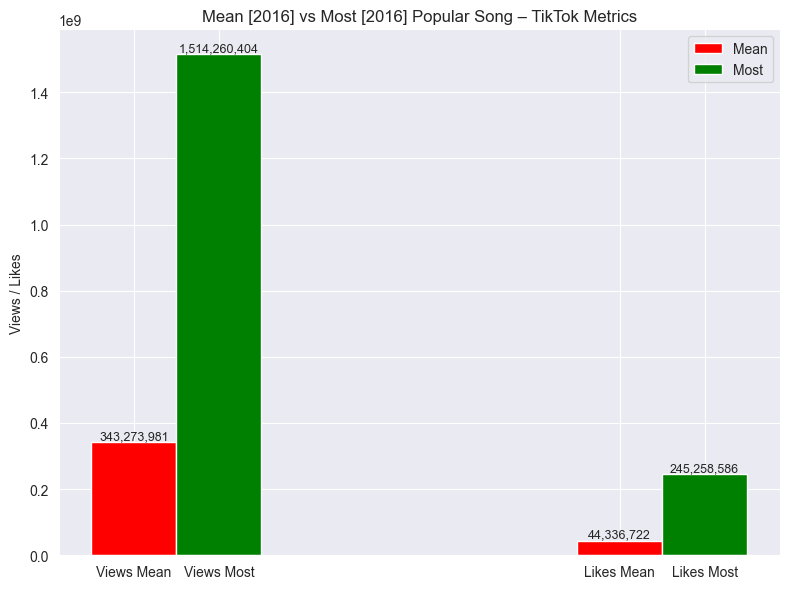

In [55]:
mean_values = summary_means.select_dtypes(include='number').iloc[0].values[:3]
most_values = most_popular_song_views.select_dtypes(include='number').iloc[0].values[:3]

bar_width = 0.35
x = np.array([0, 2])

fig, ax1 = plt.subplots(figsize=(8, 6))

v1 = ax1.bar(x[0] - bar_width/2, mean_values[0], width=bar_width, color='red')
v2 = ax1.bar(x[0] + bar_width/2, most_values[0], width=bar_width, color='green')


l1 = ax1.bar(x[1] - bar_width/2, mean_values[2], width=bar_width, color='red')
l2 = ax1.bar(x[1] + bar_width/2, most_values[2], width=bar_width, color='green')


xtick_positions = [
    x[0] - bar_width/2,
    x[0] + bar_width/2,
    x[1] - bar_width/2,
    x[1] + bar_width/2,
]
xtick_labels = ['Views Mean', 'Views Most', 'Likes Mean', 'Likes Most']

ax1.set_xticks(xtick_positions)
ax1.set_xticklabels(xtick_labels)

for bar in [v1, v2, l1, l2]:
    for b in bar:
        height = b.get_height()
        ax1.text(b.get_x() + b.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

ax1.set_ylabel('Views / Likes')
ax1.legend(['Mean', 'Most'], loc='upper right')
plt.title('Mean [2016] vs Most [2016] Popular Song – TikTok Metrics')
plt.tight_layout()
plt.show()


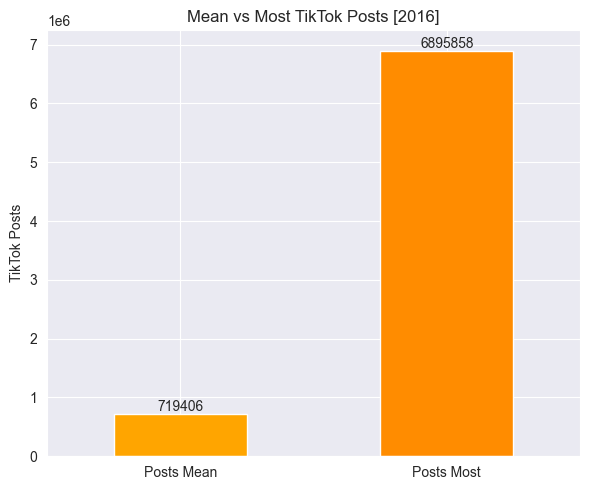

In [56]:
data_posts = {
    'Posts Mean': summary_means.tiktok_posts_mean.iloc[0],
    'Posts Most': most_popular_song_posts.tiktok_posts.iloc[0],
}

series = pd.Series(data_posts)

ax = series.plot(kind='bar', color=['orange', 'darkorange'], figsize=(6, 5))

for i, value in enumerate(series):
    ax.text(i, value, f'{int(value)}', ha='center', va='bottom')

plt.ylabel('TikTok Posts')
plt.title('Mean vs Most TikTok Posts [2016]')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.

In [57]:
exploratory_data = data.copy()
exploratory_data

,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,...,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,tidal_popularity,explicit_track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725,"390,470,936","30,716","196,631,588",...,684,62,"17,598,718",114,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,546,"323,703,884","28,113","174,597,137",...,3,67,"10,422,430",111,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538,"601,309,283","54,331","211,607,669",...,536,136,"36,321,847",172,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,445,"2,031,280,633","269,802","136,569,078",...,"2,182",264,"24,684,248",210,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423,"107,034,922","7,223","151,469,874",...,1,82,"17,660,624",105,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19,"305,049,963","65,770","5,103,054",...,NaN,2,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19,"52,282,360","4,602","1,449,767",...,NaN,1,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19,"189,972,685","72,066","6,704,802",...,NaN,1,74,6,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7,"6,817,840",NaN,NaN,"448,292",NaN,0


In [58]:
exploratory_data_tiktok = data[['artist', 'album_name', 'track', 'tiktok_views', 'tiktok_likes', 'tiktok_posts']].copy()
exploratory_data_tiktok['tiktok_views'] = exploratory_data_tiktok['tiktok_views'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)
exploratory_data_tiktok['tiktok_posts'] = exploratory_data_tiktok['tiktok_posts'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)
exploratory_data_tiktok['tiktok_likes'] = exploratory_data_tiktok['tiktok_likes'].apply(lambda x: float(str(x).replace(',', '')) if pd.notna(x) else None)

exploratory_data_tiktok

,artist,album_name,track,tiktok_views,tiktok_likes,tiktok_posts
0,Tommy Richman,Million Dollar Baby - Single,MILLION DOLLAR BABY,5332281936,651565900,5767700
1,Kendrick Lamar,Not Like Us,Not Like Us,208339025,35223547,674700
2,Artemas,I like the way you kiss me,i like the way you kiss me,3369120610,275154237,3025400
3,Miley Cyrus,Flowers - Single,Flowers,14603725994,1078757968,7189811
4,Eminem,Houdini,Houdini,NaN,NaN,16400
...,...,...,...,...,...,...
4595,$uicideboy$,For the Last Time,For the Last Time,143934379,20202000,48370
4596,Atif Aslam,"Dil Meri Na Sune (From ""Genius"")",Dil Meri Na Sune,19935,1721,NaN
4597,Lil Baby,My Turn,Grace (feat. 42 Dugg),36849005,5288677,7596
4598,Arijit Singh,November Top 10 Songs,Nashe Si Chadh Gayi,37757301,2534831,11433


In [59]:
exploratory_data_tiktok['total_interactions'] = exploratory_data_tiktok.tiktok_views + exploratory_data_tiktok.tiktok_likes + exploratory_data_tiktok.tiktok_posts

In [60]:
exploratory_data_tiktok.total_interactions.max()

np.float64(256738499230.0)

In [61]:
def ranking(value):
    if value > 1_000_000_000:
        return 1
    elif value > 1_000_000:
        return 2
    elif value > 1_000_000:
        return 3  

In [62]:
min_val = exploratory_data_tiktok['total_interactions'].min()
max_val = exploratory_data_tiktok['total_interactions'].max()

exploratory_data_tiktok['rank'] = exploratory_data_tiktok['total_interactions'].apply(ranking)

exploratory_data_tiktok

,artist,album_name,track,tiktok_views,tiktok_likes,tiktok_posts,total_interactions,rank
0,Tommy Richman,Million Dollar Baby - Single,MILLION DOLLAR BABY,5332281936,651565900,5767700,5989615536,1
1,Kendrick Lamar,Not Like Us,Not Like Us,208339025,35223547,674700,244237272,2
2,Artemas,I like the way you kiss me,i like the way you kiss me,3369120610,275154237,3025400,3647300247,1
3,Miley Cyrus,Flowers - Single,Flowers,14603725994,1078757968,7189811,15689673773,1
4,Eminem,Houdini,Houdini,NaN,NaN,16400,NaN,NaN
...,...,...,...,...,...,...,...,...
4595,$uicideboy$,For the Last Time,For the Last Time,143934379,20202000,48370,164184749,2
4596,Atif Aslam,"Dil Meri Na Sune (From ""Genius"")",Dil Meri Na Sune,19935,1721,NaN,NaN,NaN
4597,Lil Baby,My Turn,Grace (feat. 42 Dugg),36849005,5288677,7596,42145278,2
4598,Arijit Singh,November Top 10 Songs,Nashe Si Chadh Gayi,37757301,2534831,11433,40303565,2
